# Data Exploration

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from scipy.signal import argrelextrema

sns.set()

In [3]:
df = pd.read_csv('../data/exoTrain.csv')

In [5]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


### Checking out the plot vs. a smoothed version

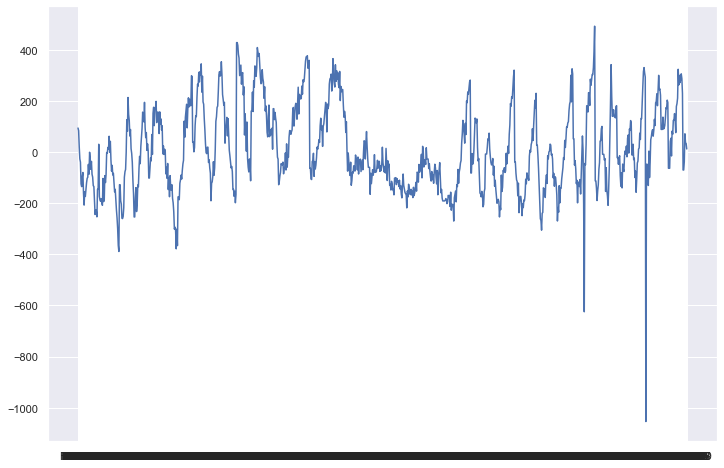

In [66]:
plt.figure(figsize = (12,8))
plt.plot(df.iloc[0,1:1000])

In [67]:
row1 = df.iloc[0,1:1000].rolling(10).mean().values

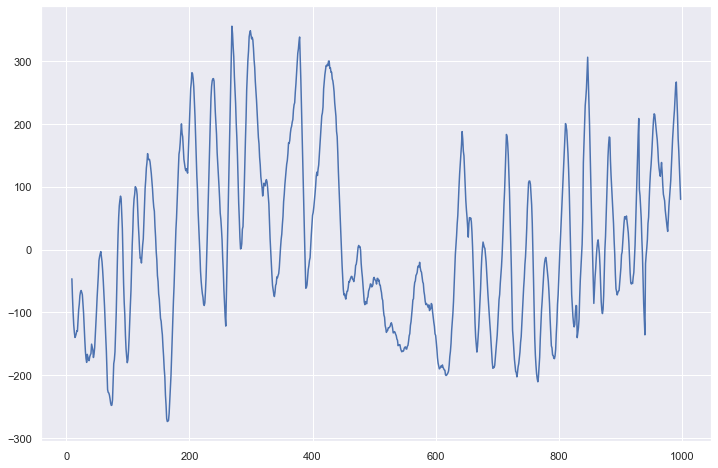

In [68]:
plt.figure(figsize = (12,8))
plt.plot(row1)

### Saving the rolling df as roll_df

In [82]:
# Semi-Arbitrary number, can change later if needed.
roll_num = 7

In [83]:
roll_df = df.iloc[:,1:].rolling(roll_num, axis = 1).mean().iloc[:,6:]

In [84]:
roll_df

,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,-18.381429,-45.541429,-68.927143,-94.680000,-120.464286,-136.938571,-143.938571,-145.564286,-148.991429,-152.271429,...,23.561429,-8.977143,-33.408571,-44.105714,-35.795714,-18.948571,-10.972857,8.954286,24.272857,33.217143
1,-58.572857,-65.208571,-72.371429,-74.491429,-81.122857,-80.502857,-80.551429,-80.491429,-79.240000,-75.997143,...,-0.395714,-3.707143,-8.844286,-14.058571,-12.944286,-12.022857,-15.484286,-14.092857,-7.205714,0.242857
2,495.165714,488.558571,474.364286,470.172857,466.278571,467.114286,470.861429,467.532857,467.072857,473.461429,...,-46.814286,-42.475714,-36.607143,-42.000000,-34.872857,-24.944286,-14.654286,-8.542857,-20.447143,-36.158571
3,318.165714,315.992857,310.997143,313.994286,315.852857,317.060000,317.118571,315.912857,316.862857,319.505714,...,-11.612857,-10.921429,-10.270000,-2.848571,3.698571,6.154286,3.841429,0.552857,-1.392857,1.137143
4,-1074.888571,-1062.817143,-1045.242857,-1024.090000,-1000.975714,-976.967143,-956.135714,-935.508571,-903.822857,-870.238571,...,-509.488571,-495.161429,-486.595714,-470.688571,-460.762857,-451.311429,-433.848571,-403.888571,-405.335714,-420.890000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-81.812857,-75.718571,-66.854286,-57.300000,-44.088571,-33.820000,-21.664286,-7.090000,5.188571,14.881429,...,70.817143,85.938571,104.547143,120.870000,134.440000,144.512857,126.208571,103.787143,83.211429,63.544286
5083,801.111429,725.271429,668.390000,593.505714,513.094286,441.995714,383.750000,330.744286,288.092857,225.290000,...,59.385714,52.611429,29.342857,11.921429,-24.908571,-56.975714,-56.777143,-38.665714,-44.494286,-28.511429
5084,264.094286,261.450000,255.678571,252.361429,250.745714,239.177143,226.695714,220.745714,211.527143,209.957143,...,4.568571,-6.318571,-21.931429,-21.075714,-19.932857,-15.622857,-2.887143,13.575714,32.570000,50.875714
5085,0.642857,0.092857,0.262857,1.631429,1.424286,1.918571,1.705714,0.688571,-0.380000,-1.451429,...,-4.152857,-3.551429,-3.568571,-3.712857,-3.371429,-2.635714,-2.578571,-6.208571,-6.662857,-6.298571


## Creating a dataframe for local maxima positions

In [134]:
x = np.random.random(12)

In [135]:
maxima = argrelextrema(x, np.greater)

In [137]:
maxima

(array([ 4,  6, 10]),)

In [136]:
np.diff(maxima)

array([[2, 4]])

## Creating a dataframe for local minima positions

In [ ]:
minima = 